In [1]:
import math
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}

In [3]:
runs=['03','04','05','06','07','08','09','10','11','13','15']
#runt=np.arange(2,11)
def fname(run):
  return('rundf/df_run_land_t' + run + '.pkl')

dfs=[pd.read_pickle(fname(r)) for r in runs]

In [4]:
def getHalfLife(y,ax,tmin=0,tmax=12,C=0,run=0):
  t=np.arange(tmin,tmax+1)
  y=y[tmin:tmax+1]
  def fit_exp_linear(t, y, C=0):
    y = y - C
    y = np.log(y)
    K, A_log = np.polyfit(t, y, 1)
    A = np.exp(A_log)
    return A, K
  def model_func(t, A, K, C):
    return A * np.exp(K * t) + C

  A, K = fit_exp_linear(t, y, C=C)
  fit_y = model_func(t, A, K, C)

  r2=np.power(np.corrcoef(y,fit_y)[0,1],2)

  ax.plot(t,y)
  ax.plot(t,fit_y)
  ax.grid(True)

  thalf=-np.log(2)/K
  ax.text(0.6,0.8,'t$_{1/2}$=' + str(round(thalf,2)), transform=ax.transAxes)
  ax.text(0.6,0.73,'r$^2$=' + str(round(r2,4)), transform=ax.transAxes)
  ax.text(0.6,0.87,'Landtime=' + str(run), transform=ax.transAxes)
  ax.set_xlabel('Time (h)')
  ax.set_ylabel('Pdef (hPa)')
  return(thalf)

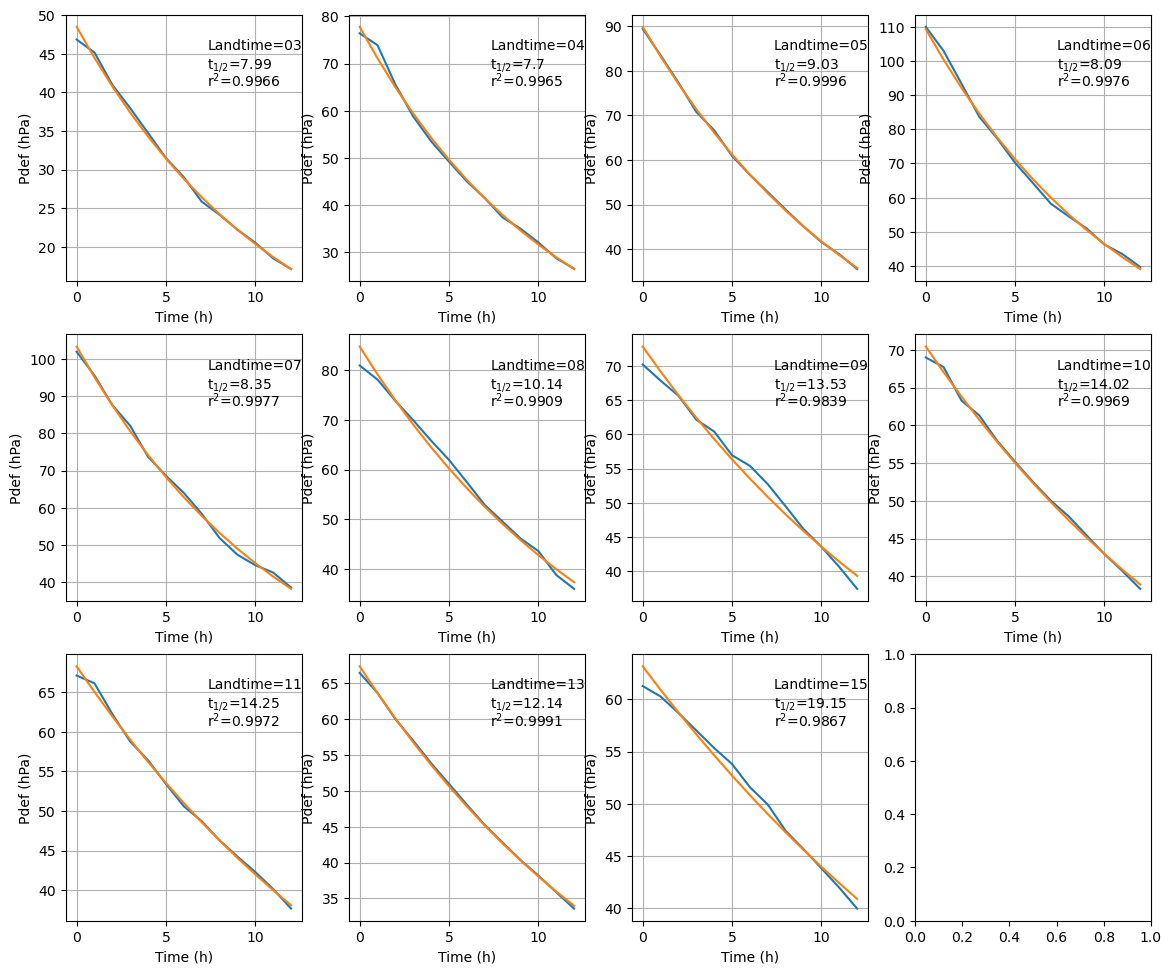

In [5]:
def pdef(p):
  return(1016-p)

fig, axs = plt.subplots(3,4,figsize=(14,12),dpi=100)
P0=[]
R0=[]
V0=[]
th=[]
for n,df in enumerate(dfs):
  p=df.pmin.values
  R0.append(df.rV10max.values[0])
  V0.append(df.V10max.values[0])
  y=pdef(p)
  P0.append(y[0])
  th.append(getHalfLife(y,axs.flat[n],run=runs[n],tmin=0))

# plt.plot(V0,R0)

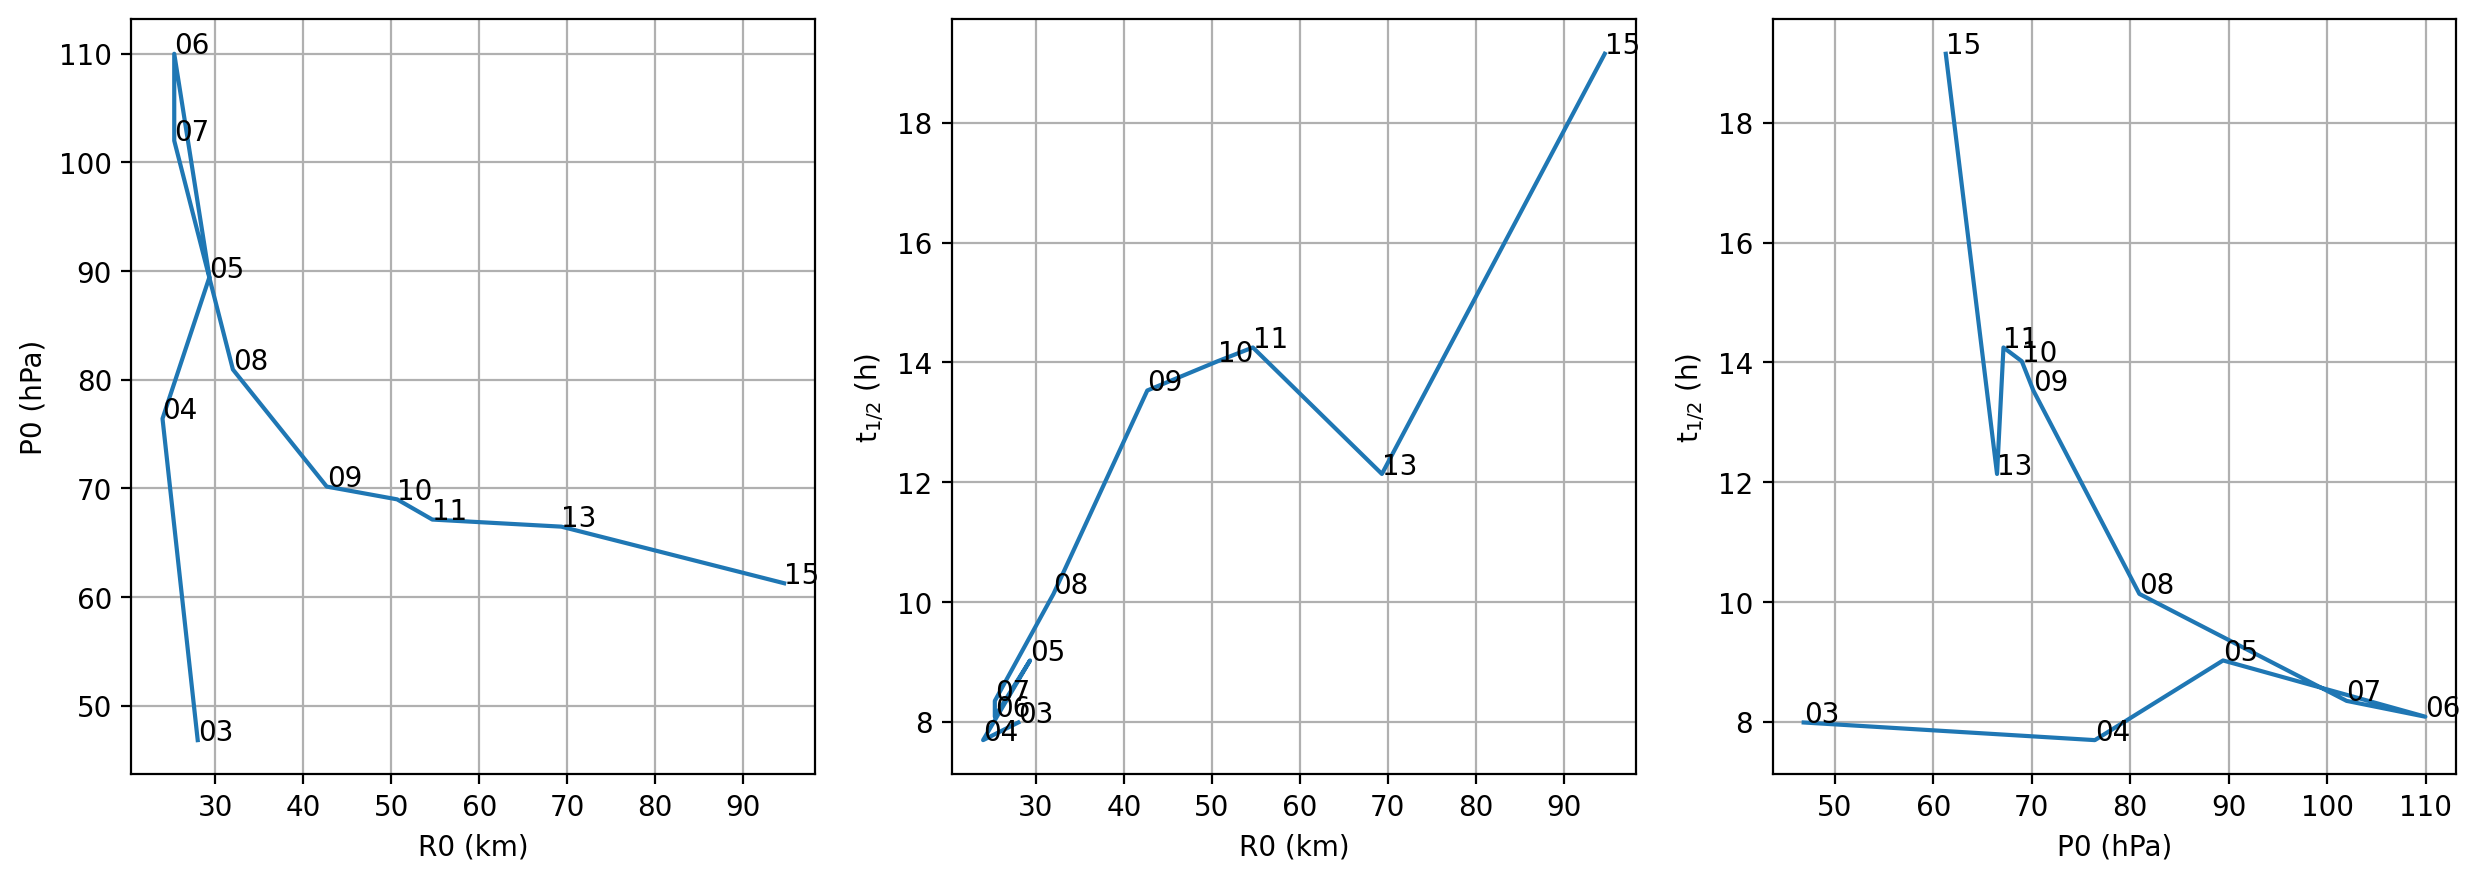

In [6]:
def plot_xy(x,y,xl,yl,ts,ax):
  ax.plot(x,y)
  ax.set_xlabel(xl)
  ax.set_ylabel(yl)
  ax.grid(True)
  for n,t in enumerate(ts):
    ax.text(x[n],y[n],str(t))

fig,axs=plt.subplots(1,3,figsize=(15,5),dpi=200)

plot_xy(R0,P0,'R0 (km)','P0 (hPa)',runs,axs[0])
plot_xy(R0,th,'R0 (km)','t$_{1/2}$ (h)',runs,axs[1])
plot_xy(P0,th,'P0 (hPa)','t$_{1/2}$ (h)',runs,axs[2])

